In [2]:
import sys
sys.path.append('../')
import subprocess
import pandas as pd                                                                           
import numpy as np                                                                            
import model_utils as mu
import matplotlib.pyplot as plt                                                               
from scipy.optimize import curve_fit
from scipy.special import expit                                                               

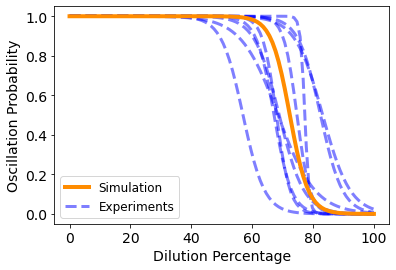

In [3]:
logistic_fits = pd.read_csv('../data_analysis/dilution/exp_osc_perc_fit_result.txt',          
                            sep=' ', header=None, names=['File_Name', 'Slope', 'Intercept'])  
data_path = '../dilution/results_droplets_cluster/'
cmd = ['ls', data_path]                                                                       
proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)                                          
stdout, stderr = proc.communicate()                                                           
file_list = stdout.decode("utf-8").split()  
p_guess = [0.5, 0.3]
p_bounds = ([0, 0.1], [1, 0.5])
x = []
y = []
for d in file_list:
    data = np.load(data_path + d, allow_pickle=True)
    x.append(data['dil'].item())
    y.append(data['osc_perc'].item()/100)
# Fit sigmoidal
popt, pcov = curve_fit(mu.sigmoid, x, y, p0=p_guess)
# Plot
fig = plt.figure()                                                                            
ax = plt.gca()                                                                                
# Droplet Simulations                                                                         
xfit = np.linspace(0, 1.0, 100)
ax.plot(100*(1-xfit), mu.sigmoid(xfit, popt[0], popt[1]), color='darkorange', 
        linewidth=4, zorder=1, label='Simulation')
# Experiments                                                                                 
x = np.linspace(0, 100, 100)                                                                  
for idx, data in logistic_fits.iterrows():                                                    
    y = expit(x * data['Slope'] + data['Intercept'])                                          
    ax.plot(x, y, linestyle='--', color='blue', linewidth=3, alpha=0.5, zorder=0)                       
ax.tick_params(labelsize=14)                                                                  
ax.lines[-1].set_label('Experiments')                                                         
ax.set_xlabel('Dilution Percentage', fontsize=14)                                             
ax.set_ylabel('Oscillation Probability', fontsize=14)                                         
ax.legend(loc='lower left', fontsize=12)                                                     
plt.savefig('./SVGs/Osc_Prob.svg', format='svg', bbox_inches='tight')
plt.show()  

# For Figure 4 Explanation

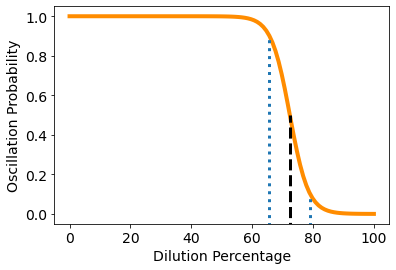

In [19]:
data_path = '../dilution/results_droplets_cluster/'
cmd = ['ls', data_path]                                                                       
proc = subprocess.Popen(cmd, stdout=subprocess.PIPE)                                          
stdout, stderr = proc.communicate()                                                           
file_list = stdout.decode("utf-8").split()  
p_guess = [0.5, 0.3]
p_bounds = ([0, 0.1], [1, 0.5])
x = []
y = []
for d in file_list:
    data = np.load(data_path + d, allow_pickle=True)
    x.append(data['dil'].item())
    y.append(data['osc_perc'].item()/100)
# Fit sigmoidal
popt, pcov = curve_fit(mu.sigmoid, x, y, p0=p_guess)
# Plot
fig = plt.figure()                                                                            
ax = plt.gca()                                                                                
# Droplet Simulations                                                                         
xfit = np.linspace(0, 1.0, 100)
ax.plot(100*(1-xfit), mu.sigmoid(xfit, popt[0], popt[1]), color='darkorange', 
        linewidth=4, zorder=1)
plt.vlines(100*(1-popt[1]), -0.5, 0.5, linestyle='--', linewidth=3, color='k')
x_10 = popt[1] - np.log(1.0/0.1 - 1.0)/popt[0]
plt.vlines(100*(1-x_10), -0.5, 0.1, linestyle=':', linewidth=3)
x_90 = popt[1] - np.log(1.0/0.9 - 1.0)/popt[0]
plt.vlines(100*(1-x_90), -0.5, 0.9, linestyle=':', linewidth=3)
ax.tick_params(labelsize=14)                                                                  
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('Dilution Percentage', fontsize=14)                                             
ax.set_ylabel('Oscillation Probability', fontsize=14)                                         
plt.savefig('./SVGs/Osc_Prob_Explanation_Fig_4.svg', format='svg', bbox_inches='tight')
plt.show()  